<a href="https://colab.research.google.com/github/Plumz17/PCD_Assignment01/blob/main/PCD_Assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Cloning Github Repository to get the Image
!rm -rf PCD_Assignment01
!git clone https://github.com/Plumz17/PCD_Assignment01

Cloning into 'PCD_Assignment01'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 18 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (18/18), 548.36 KiB | 30.46 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [5]:
# First Digital Image Processing Assignment - Analysis of Upsampling and Downsampling - Anders Emmanuel Tan (24/541351/PA/22964)

# Import Important Libraries
import cv2 # For Reading Image
import numpy as np # For Manipulating Image Matrix
import matplotlib.pyplot as plt # For Showing Image

filename = "/content/PCD_Assignment01/image.png" # Image Source: Persona 4 - Atlus Co., Ltd.
img = cv2.imread(filename) # Read Image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Change the color map since apparently CV2 defaults on BGR and not RGB

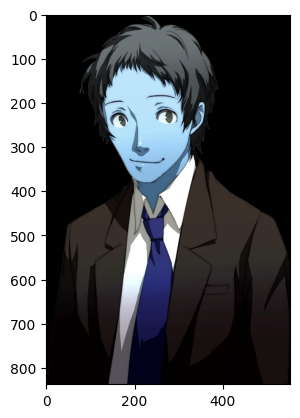

In [6]:
def show(img): # Helper function to check if image can be processed
  plt.imshow(img)

show(img)

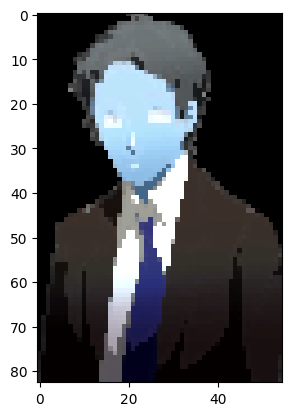

In [9]:
#Down Sampling using Maximum Method
def downsample_max(img, factor):
  height, width, channels = img.shape #Extract the height, width, and channels of the image
  new_height = height // factor
  new_width = width // factor
  new_img = np.zeros((new_height, new_width, channels), dtype=np.uint8) # Create an empty image with the reduced size
  for i in range(new_height): #Process every pixel of the new image
    for j in range(new_width):
      # Calculate the starting and ending coordinates for the current block
      start_row = i * factor
      end_row = (i + 1) * factor
      start_col = j * factor
      end_col = (j + 1) * factor
      block = img[start_row:end_row, start_col:end_col] # Extract the current block of the image
      new_img[i, j] = np.max(block, axis=(0, 1)) # Find the maximum value for each channel within the block and keep the channels intact.
  return new_img

new_image_max = downsample_max(img, 10)
show(new_image_max)

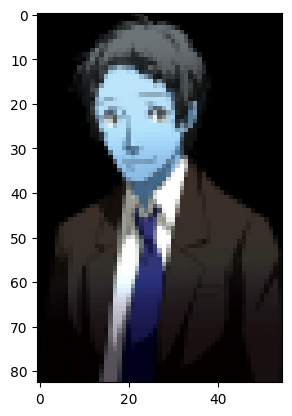

In [10]:
#Down Sampling using Average Method

def downsample_avg(img, factor):
  height, width, channels = img.shape #Extract the height, width, and channels of the image
  new_height = height // factor
  new_width = width // factor
  new_img = np.zeros((new_height, new_width, channels), dtype=np.uint8) # Create an empty image with the reduced size
  for i in range(new_height): #Process every pixel of the new image
    for j in range(new_width):
      # Calculate the starting and ending coordinates for the current block
      start_row = i * factor
      end_row = (i + 1) * factor
      start_col = j * factor
      end_col = (j + 1) * factor
      block = img[start_row:end_row, start_col:end_col] # Extract the current block of the image
      new_img[i, j] = np.average(block, axis=(0, 1)) # Find the average value for each channel within the block and keep the channels intact.
  return new_img

new_image_avg = downsample_avg(img, 10)
show(new_image_avg)

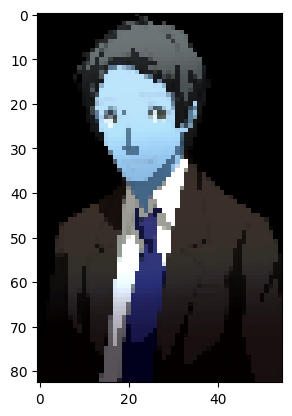

In [11]:
#Down Sampling using Median Method

def downsample_med(img, factor):
  height, width, channels = img.shape #Extract the height, width, and channels of the image
  new_height = height // factor
  new_width = width // factor
  new_img = np.zeros((new_height, new_width, channels), dtype=np.uint8) # Create an empty image with the reduced size
  for i in range(new_height): #Process every pixel of the new image
    for j in range(new_width):
      # Calculate the starting and ending coordinates for the current block
      start_row = i * factor
      end_row = (i + 1) * factor
      start_col = j * factor
      end_col = (j + 1) * factor
      block = img[start_row:end_row, start_col:end_col] # Extract the current block of the image
      new_img[i, j] = np.median(block, axis=(0, 1)) # Find the median value for each channel within the block and keep the channels intact.
  return new_img

new_image_med = downsample_med(img, 10)
show(new_image_med)

In [ ]:
#Up Sampling using Nearest Neighbor Method

def upsample_nn(img, factor=2):
  return cv2.resize(img, None, fx=factor, fy=factor, interpolation=cv2.INTER_NEAREST) # Upsample an Image using Nearest Neighbor

new_image_nn = upsample_nn(new_image_avg, 10)
show(new_image_nn)

In [ ]:
#Up Sampling using Bilinear Method

def upsample_bilinear(img, factor=2):
  return cv2.resize(img, None, fx=factor, fy=factor, interpolation=cv2.INTER_LINEAR) # Upsample an Image using Billinear

new_image_bilinear = upsample_bilinear(new_image_avg, 10)
show(new_image_bilinear)

In [ ]:
#Up Sampling using Bicubic Method

def upsample_bicubic(img, factor=2):
  return cv2.resize(img, None, fx=factor, fy=factor, interpolation=cv2.INTER_CUBIC) # Upsample an Image using Bicubic

new_image_bicubic = upsample_bicubic(new_image_avg, 10)
show(new_image_bicubic)